# Deskripsi Proyek
Siapkan sebuah prototipe model machine learning untuk Zyfra. Perusahaan ini bergerak di bidang pengembangan solusi efisien untuk industri berat.
Model yang kita buat harus bisa memprediksi jumlah emas yang diekstraksi atau diperoleh dari bijih emas. Tersedia data terkait proses ekstraksi dan pemurnian bijih emas yang bisa kamu gunakan.
Nantinya, model ini diharapkan akan membantu terciptanya proses produksi yang lebih efisien dan menyingkirkan parameter-parameter yang tidak menghasilkan keuntungan.

Yang perlu dilakukan  untuk:
1. Mempersiapkan data yang tersedia
2. Menjalankan analisis data
3. Mengembangkan dan melatih model

Untuk menyelesaikan proyek ini, kamu mungkin perlu menggunakan dokumentasi dari library Pandas, Matplotlib, dan Sklearn.

Data yang kamu butuhkan tersimpan dalam tiga file:
- gold_recovery_train.csv — unduh training dataset
- gold_recovery_test.csv — unduh test dataset
- gold_recovery_full.csv — unduh dataset sumber

Sebagian parameter tidak tersedia karena pengukuran dan/atau penghitungannya dilakukan jauh setelahnya. Itulah sebabnya, beberapa fitur yang ada di training set mungkin tidak ada di test set. Test set-nya pun juga tidak memuat target.

Dataset sumber memuat training dan test set dengan semua fitur-fiturnya.

Data yang kita miliki adalah data mentah yang baru saja diunduh dari gudang data. Sebelum membuat model, sebaiknya periksa ketepatan datanya.

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Membuat sebuah prototipe model machine learning untuk Zyfra.

# Instruksi Proyek
1. Siapkan datanya

    1.1. Buka file dan pelajari datanya.
        File path:
        - /datasets/gold_recovery_train.csv
        - /datasets/gold_recovery_test.csv
        - /datasets/gold_recovery_full.csv

    1.2. Periksa apakah perolehan emas telah dihitung dengan benar. Menggunakan training set, hitung perolehan untuk fitur rougher.output.recovery. Temukan MAE antara perhitunganmu dan nilai fitur. Tunjukkan apa yang kamu temukan.

    1.3. Analisis fitur-fitur yang tidak tersedia pada test set. Apa saja parameter-parameter ini? Tipe apakah parameter-parameter tersebut?

    1.4. Lakukan pra-pemrosesan data.


2. Analisis datanya

    2.1. Buat catatan terkait bagaimana konsentrasi logam (Au, Ag, Pb) berubah, tergantung pada tahap pemurniannya.

    2.2. Bandingkan distribusi ukuran partikel feed dalam training set dan test set. Jika distribusinya bervariasi secara signifikan, evaluasi model akan salah.

    2.3. Pertimbangkan total konsentrasi semua substansi di tahap yang berbeda: feed mentah, konsentrasi yang lebih kasar, dan konsentrasi akhir. Apakah kamu melihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah perlu menghapus nilai-nilai tersebut dari kedua sampel? Jelaskan yang kamu temukan dan singkirkan anomalinya.


3. Buat modelnya

    3.1. Buat sebuah fungsi yang digunakan untuk menghitung nilai sMAPE akhir.

    3.2. Lakukan pelatihan pada model yang berbeda-beda. Evaluasi model-model tersebut menggunakan cross-validation. Pilih model terbaik dan uji model tersebut menggunakan sampel tes atau test sample. Tunjukkan apa yang kamu temukan.

    Gunakan formula sMAPE dan sMape akhir untuk metrik evaluasi


# Deskripsi Data
Proses teknologi
- Rougher feed — bahan mentah untuk proses flotasi
- Rougher additions (atau reagent additions) — reagen untuk flotasi: Xanthate, Sulphate, Depressant
    - Xanthate — penggerak atau aktivator flotasi
    - Sulphate — natrium sulfida, khusus untuk proses ini
    - Depressant — natrium silikat
- Rougher process — flotasi
- Rougher tails — residu produk
- Float banks — unit flotasi
- Cleaner process — pemurnian
- Rougher Au — konsentrat emas yang lebih kasar
- Final Au — konsentrat emas akhir

Parameter dari setiap tahapan yang tersedia
- air amount — volume udara
- fluid levels
- feed size — ukuran partikel umpan
- feed rate

Penamaan fitur
Berikut merupakan cara untuk memberikan nama pada fitur-fitur yang ada:
[stage].[parameter_type].[parameter_name]
Contoh: rougher.input.feed_ag

Nilai yang memungkinkan untuk [stage]:
- rougher — flotasi
- primary_cleaner — pemurnian pertama
- secondary_cleaner — pemurnian kedua
- final — karakteristik akhir

Nilai yang memungkinkan untuk [parameter_type]:
- input — parameter bahan mentah
- output — parameter produk
- state — parameter yang menunjukkan karakteristik tahapan saat ini
- calculation — perhitungan karakteristik



## Siapkan Datanya

### Buka file dan pelajari datanya
File path:
- /datasets/gold_recovery_train.csv
- /datasets/gold_recovery_test.csv
- /datasets/gold_recovery_full.csv

In [1]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Unduh dataset
train_data = pd.read_csv('/datasets/gold_recovery_train.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full.csv')

#### Muat File Data "train_data"

In [3]:
# Tampilkan 5 baris pertama
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
# Check dimensi dataframe
train_data.shape

(16860, 87)

In [5]:
# Informasi data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


#### Muat File Data "test_data"

In [6]:
# Tampilkan 5 baris pertama
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
# Check dimensi dataframe
test_data.shape

(5856, 53)

In [8]:
# Informasi data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

#### Muat File Data "full_data"

In [9]:
# Tampilkan 5 baris pertama
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
# Check dimensi dataframe
full_data.shape

(22716, 87)

In [11]:
# Informasi data
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


###  Preprocessing Data / Pra-Pemroses

#### train_data

In [12]:
# Check Duplikasi Data
print(f'Duplikasi Data : {train_data.duplicated().sum()}')

Duplikasi Data : 0


In [13]:
# Check Missing Values
train_data.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [14]:
# Statistik Deskriptif
train_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [15]:
# Mengatasi missing values
train_data = train_data.fillna(train_data.median())

#### test_data

In [16]:
# Check Duplikasi Data
print(f'Duplikasi Data : {test_data.duplicated().sum()}')

Duplikasi Data : 0


In [17]:
# Check Missing Values
test_data.isnull().sum().head()

date                                  0
primary_cleaner.input.sulfate       302
primary_cleaner.input.depressant    284
primary_cleaner.input.feed_size       0
primary_cleaner.input.xanthate      166
dtype: int64

In [18]:
# Statistik Deskriptif
test_data.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [19]:
# Mengatasi missing values
test_data = test_data.fillna(test_data.median())

#### full_data

In [20]:
# Check Duplikasi Data
print(f'Duplikasi Data : {full_data.duplicated().sum()}')

Duplikasi Data : 0


In [21]:
# Check Missing Values
full_data.isnull().sum().head()

date                              0
final.output.concentrate_ag      89
final.output.concentrate_pb      87
final.output.concentrate_sol    385
final.output.concentrate_au      86
dtype: int64

In [22]:
# Statistik Deskriptif
full_data.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [23]:
# Mengatasi missing values
full_data = full_data.fillna(full_data.median())

###  Periksa Perolehan Emas Apakah Telah Dihitung dengan Benar.

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error


In [25]:
# Hitung ulang perolehan emas berdasarkan fitur rougher.output.recovery
epsilon = 1e-8
train_data['kolom_perolehan_emas'] = (
    train_data['rougher.output.concentrate_au'] * 
    (train_data['rougher.input.feed_au'] - train_data['rougher.output.tail_au'] + epsilon)
) / (
    train_data['rougher.input.feed_au'] * 
    (train_data['rougher.output.concentrate_au'] - train_data['rougher.output.tail_au'] + epsilon)
) * 100

In [26]:
# Replace NaN values with a specific value (e.g., 0)
train_data['kolom_perolehan_emas'].fillna(0, inplace=True)


In [27]:
# Replace infinite values with a specific value (e.g., 0)
train_data.replace([np.inf, -np.inf], 0, inplace=True)

In [28]:
# Check for Extreme Values:
train_data['kolom_perolehan_emas'] = train_data['kolom_perolehan_emas'].clip(lower=0, upper=100)

In [29]:
# Check NaN Values
print("Number of NaN values in kolom_perolehan_emas:", train_data['kolom_perolehan_emas'].isnull().sum())


Number of NaN values in kolom_perolehan_emas: 0


In [30]:
# Print Unique Values
print("Unique values in kolom_perolehan_emas:", np.unique(train_data['kolom_perolehan_emas']))


Unique values in kolom_perolehan_emas: [0.00000000e+00 4.52947268e-02 1.31091253e-01 ... 9.98476630e+01
 9.99790406e+01 1.00000000e+02]


In [31]:
# Ambil nilai asli dari fitur rougher.output.recovery
nilai_asli = train_data['rougher.output.recovery']

In [32]:
# Ambil nilai yang dihitung ulang
nilai_diitung_ulang = train_data['kolom_perolehan_emas']

In [33]:
# Hitung MAE
mae = mean_absolute_error(nilai_asli, nilai_diitung_ulang)

In [34]:
# Tampilkan MAE
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 7.674101925891747


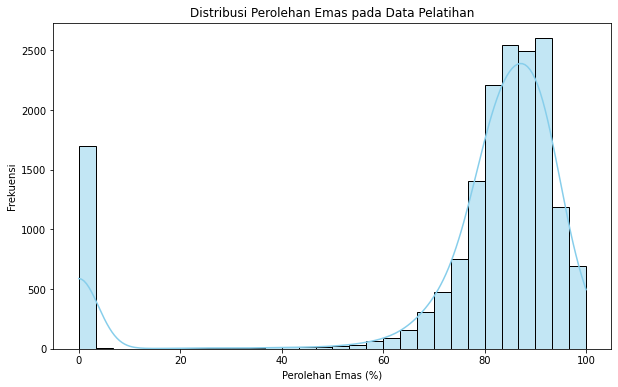

In [35]:
# Visualisasi distribusi perolehan emas pada data pelatihan
plt.figure(figsize=(10, 6))
sns.histplot(train_data['kolom_perolehan_emas'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Perolehan Emas pada Data Pelatihan')
plt.xlabel('Perolehan Emas (%)')
plt.ylabel('Frekuensi')
plt.show()

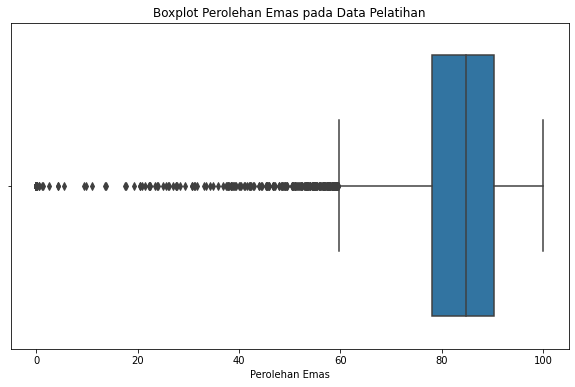

In [36]:
# Analisis outliers pada perolehan emas
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['kolom_perolehan_emas'])
plt.title('Boxplot Perolehan Emas pada Data Pelatihan')
plt.xlabel('Perolehan Emas')
plt.show()


In [37]:
# Hitung nilai batas atas dan batas bawah untuk outliers
Q1 = train_data['kolom_perolehan_emas'].quantile(0.25)
Q3 = train_data['kolom_perolehan_emas'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [38]:
# Jumlah outliers
outliers = train_data[(train_data['kolom_perolehan_emas'] < lower_bound) | (train_data['kolom_perolehan_emas'] > upper_bound)]
print(f'Jumlah outliers: {len(outliers)}')

Jumlah outliers: 1911


### Analisis Fitur-Fitur pada Dataset

In [39]:
# Ambil informasi tipe fitur dari data pelatihan
tipe_fitur = train_data.dtypes

In [40]:
# Tampilkan informasi tipe fitur
print(tipe_fitur)

date                                           object
final.output.concentrate_ag                   float64
final.output.concentrate_pb                   float64
final.output.concentrate_sol                  float64
final.output.concentrate_au                   float64
                                               ...   
secondary_cleaner.state.floatbank5_b_air      float64
secondary_cleaner.state.floatbank5_b_level    float64
secondary_cleaner.state.floatbank6_a_air      float64
secondary_cleaner.state.floatbank6_a_level    float64
kolom_perolehan_emas                          float64
Length: 88, dtype: object


In [41]:
# Identifikasi fitur-fitur yang tidak tersedia pada test set
fitur_tidak_tersedia = set(train_data.columns) - set(test_data.columns)


In [42]:
# Handle fitur yang tidak tersedia pada test set
import numpy as np
for fitur in fitur_tidak_tersedia:
    # Tambahkan kolom baru yang hilang ke dalam data uji
    test_data[fitur] = np.nan
    
    # Handle fitur numerik atau kategorikal
    if tipe_fitur[fitur] == np.float64 or tipe_fitur[fitur] == np.int64:
        # Handle fitur numerik (contoh: isi dengan rata-rata)
        mean_value = train_data[fitur].mean()
        test_data[fitur].fillna(mean_value, inplace=True)
    else:
        # Handle fitur kategorikal (contoh: isi dengan mode)
        mode_value = train_data[fitur].mode()[0]
        test_data[fitur].fillna(mode_value, inplace=True)

In [43]:
# Cek jumlah nilai yang hilang pada data pelatihan
print(train_data.isnull().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
kolom_perolehan_emas                          0
Length: 88, dtype: int64


In [44]:
# Cek jumlah nilai yang hilang pada data pengujian
print(test_data.isnull().sum())

date                                                  0
primary_cleaner.input.sulfate                         0
primary_cleaner.input.depressant                      0
primary_cleaner.input.feed_size                       0
primary_cleaner.input.xanthate                        0
                                                     ..
primary_cleaner.output.tail_ag                        0
primary_cleaner.output.concentrate_au                 0
rougher.output.tail_sol                               0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
primary_cleaner.output.tail_pb                        0
Length: 88, dtype: int64


In [45]:
# Pilih Target Column
target_column = 'final.output.concentrate_au'

In [46]:
# Pisahkan dataset menjadi fitur (X) dan target (y)
X = train_data.drop('final.output.concentrate_au', axis=1)
y = train_data['final.output.concentrate_au']

In [47]:
# Penskalaan atau Normalisasi:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Hapus kolom waktu atau kolom non-numerik lainnya
X_numeric = X.select_dtypes(include=['float64', 'int64'])

# Lakukan penskalaan pada data numerik
X_scaled = scaler.fit_transform(X_numeric)

In [48]:
# Bagi data menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

**Kesimpulan Tahap 1:**
- Ditemukan banyak nilai yang hilang, dan saat ini sudah dilakukan penanganan nilai yang hilang tersebut. 
- Tidak ditemukan duplikasi data
- Nilai Mean Absolute Error (MAE): 7.674101925891747

## Analisis Datanya

### Konsentrasi Logam (Au, Ag, Pb) pada Setiap Tahap Pemurnian

In [49]:
# Pilih kolom-kolom yang mengandung informasi konsentrasi logam
columns_au = [col for col in train_data.columns if 'output.concentrate_au' in col]
columns_ag = [col for col in train_data.columns if 'output.concentrate_ag' in col]
columns_pb = [col for col in train_data.columns if 'output.concentrate_pb' in col]

In [50]:
# Gabungkan kolom-kolom yang terpilih
columns_concentrate = columns_au + columns_ag + columns_pb


In [51]:
# Filter kolom-kolom yang ada di dalam dataset
columns_concentrate = [col for col in columns_concentrate if col in train_data.columns]

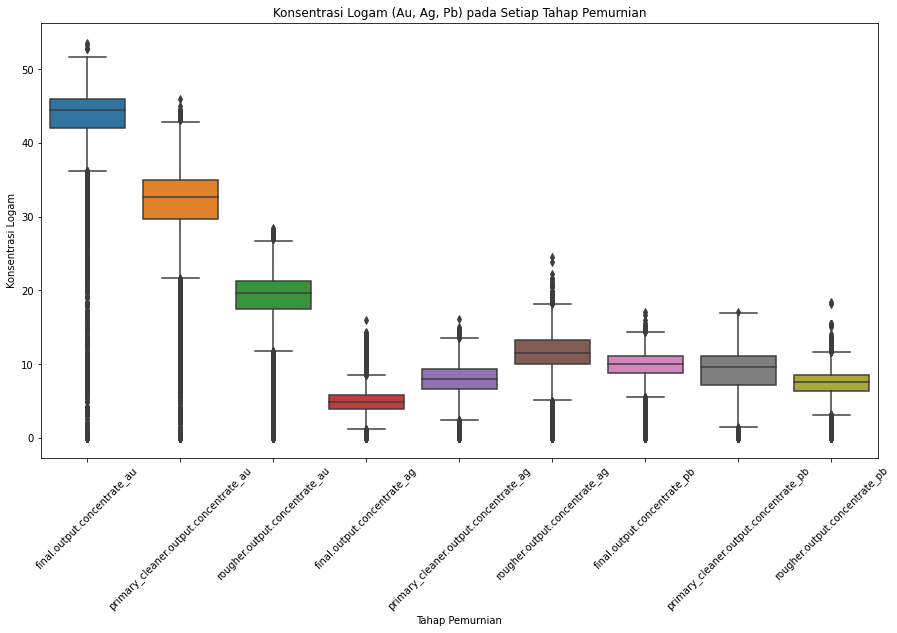

In [52]:
# Plot konsentrasi logam pada setiap tahap pemurnian
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_data[columns_concentrate])
plt.title('Konsentrasi Logam (Au, Ag, Pb) pada Setiap Tahap Pemurnian')
plt.ylabel('Konsentrasi Logam')
plt.xlabel('Tahap Pemurnian')
plt.xticks(rotation=45)
plt.show()

**Bacaan Grafik**

Untuk 3 boxplot pertama, yaitu final.output.concentrate_au (biru), primary_cleaner.output.concentrate_au (orange), dan rougher.output.concentrate_au (hijau)
- Boxplot biru : nilai kuartil Q1 berada di sekitar 36, Q2 berada di sekitar 45, dan Q3 berada di sekitar 46. Whisker atas berada diatas 51 dan whisker bawah berada di 0 hingga sekitar 37.
- Boxplot orange : nilai kuartil Q1 berada di sekitar 30, Q2 berada di sekitar 33, dan Q3 berada di sekitar 35. Whisker atas berada di 42 hingga 46 dan whisker bawah berada di 0 hingga sekitar 21.
- Boxplot hijau : nilai kuartil Q1 berada di sekitar 18, Q2 berada di sekitar 20, dan Q3 berada di sekitar 21. Whisker atas berada di 27 hingga 29 dan whisker bawah berada di 0 hingga sekitar 12.

### Distribusi Ukuran Partikel Feed
Bandingkan distribusi ukuran partikel feed dalam training set dan test set. Jika distribusinya bervariasi secara signifikan, evaluasi model akan salah.

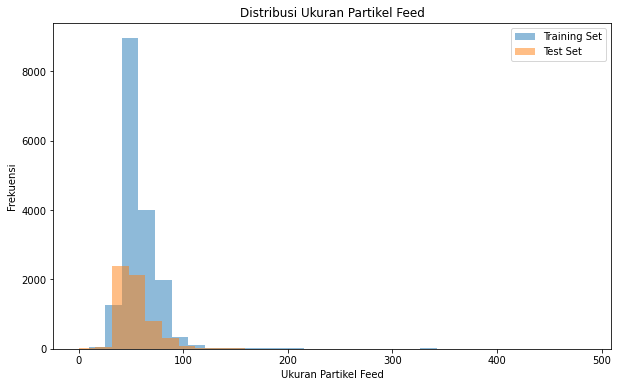

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['rougher.input.feed_size'], alpha=0.5, label='Training Set', bins=30)
plt.hist(test_data['rougher.input.feed_size'], alpha=0.5, label='Test Set', bins=30)
plt.title('Distribusi Ukuran Partikel Feed')
plt.xlabel('Ukuran Partikel Feed')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Bacaan Grafik**

Pada grafik Distribusi Ukuran partikel Feed diagram batang training set (warna biru) memliki frekuensi yang jauh lebih tinggi dibandingkan diagram batang test set (warna orange)

### Total Konsentrasi Substansi
Pertimbangkan total konsentrasi semua substansi di tahap yang berbeda: feed mentah, konsentrasi yang lebih kasar, dan konsentrasi akhir. Apakah kamu melihat adanya nilai abnormal dalam distribusi total? Jika ya, apakah perlu menghapus nilai-nilai tersebut dari kedua sampel? Jelaskan yang kamu temukan dan singkirkan anomalinya.

In [54]:
# Buat kolom total konsentrasi untuk setiap tahap
train_data['total_feed_concentration'] = train_data.filter(like='input').sum(axis=1)
train_data['total_rougher_concentration'] = train_data.filter(like='rougher.output.concentrate').sum(axis=1)
train_data['total_final_concentration'] = train_data.filter(like='final.output.concentrate').sum(axis=1)

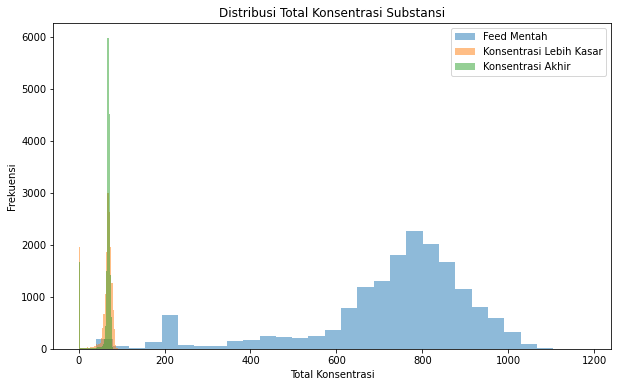

In [55]:
# Plot distribusi total konsentrasi
plt.figure(figsize=(10, 6))
plt.hist(train_data['total_feed_concentration'], alpha=0.5, label='Feed Mentah', bins=30)
plt.hist(train_data['total_rougher_concentration'], alpha=0.5, label='Konsentrasi Lebih Kasar', bins=30)
plt.hist(train_data['total_final_concentration'], alpha=0.5, label='Konsentrasi Akhir', bins=30)
plt.title('Distribusi Total Konsentrasi Substansi')
plt.xlabel('Total Konsentrasi')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

**Bacaan Grafik**

Pada grafik Distribusi Total Konsentrasi Substansi:
- Diagram batang Feed Mentah (warna biru) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 1100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 2000. Koordinat diagram batang tertinggi berada di (800,2000) yang lalu kemudian menurun secara bertahap. 
- Diagram batang Konsentrasi Lebih Kasar (warna orange) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 3000. Koordinat diagram batang tertinggi berada di (80,3000) yang lalu kemudian menurun secara bertahap.  
- Diagram batang Konsentrasi Akhir (warna hijau) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 90, dengan frekuensi (sumbu y) dari 0 hingga sekitar 6000. Koordinat diagram batang tertinggi berada di (70,6000) yang lalu kemudian menurun secara bertahap. 

**Kesimpulan Tahap 2:**
**Bacaan Grafik**
1. Grafik Konsentrasi Logam (Au, Ag, Pb) pada Setiap Tahap Pemurnian

Untuk 3 boxplot pertama, yaitu final.output.concentrate_au (biru), primary_cleaner.output.concentrate_au (orange), dan rougher.output.concentrate_au (hijau)
- Boxplot biru : nilai kuartil Q1 berada di sekitar 36, Q2 berada di sekitar 45, dan Q3 berada di sekitar 46. Whisker atas berada diatas 51 dan whisker bawah berada di 0 hingga sekitar 37.
- Boxplot orange : nilai kuartil Q1 berada di sekitar 30, Q2 berada di sekitar 33, dan Q3 berada di sekitar 35. Whisker atas berada di 42 hingga 46 dan whisker bawah berada di 0 hingga sekitar 21.
- Boxplot hijau : nilai kuartil Q1 berada di sekitar 18, Q2 berada di sekitar 20, dan Q3 berada di sekitar 21. Whisker atas berada di 27 hingga 29 dan whisker bawah berada di 0 hingga sekitar 12.

2. Grafik Distribusi Ukuran Partikel Feed

Pada grafik Distribusi Ukuran partikel Feed diagram batang training set (warna biru) memliki frekuensi yang jauh lebih tinggi dibandingkan diagram batang test set (warna orange)

3. Grafik Distribusi Total Konsentrasi Substansi

Pada grafik Distribusi Total Konsentrasi Substansi:
- Diagram batang Feed Mentah (warna biru) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 1100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 2000. Koordinat diagram batang tertinggi berada di (800,2000) yang lalu kemudian menurun secara bertahap. 
- Diagram batang Konsentrasi Lebih Kasar (warna orange) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 3000. Koordinat diagram batang tertinggi berada di (80,3000) yang lalu kemudian menurun secara bertahap.  
- Diagram batang Konsentrasi Akhir (warna hijau) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 90, dengan frekuensi (sumbu y) dari 0 hingga sekitar 6000. Koordinat diagram batang tertinggi berada di (70,6000) yang lalu kemudian menurun secara bertahap. 

## Buat modelnya

### Pelatihan dan Evaluasi Model
Buat sebuah fungsi yang digunakan untuk menghitung nilai sMAPE akhir.

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict

In [57]:
# Fungsi sMAPE
def calculate_smape(y_true, y_pred):
    epsilon = 1e-10  # Nilai kecil untuk menghindari pembagian dengan nol
    denominator = np.abs(y_true) + np.abs(y_pred) + epsilon
    percentage_error = 200 * np.abs(y_pred - y_true) / denominator
    percentage_error[denominator == 0] = 0  # Penanganan kasus pembagian dengan nol
    smape = np.mean(percentage_error)
    return smape

In [58]:
# Fungsi sMAPE akhir
def calculate_final_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

In [59]:
# Fungsi yang perlu dihitung
def calculate_smape_final(y_true, y_pred):
    smape_rougher = calculate_smape(y_true[:, 0], y_pred[:, 0])
    smape_final = calculate_smape(y_true[:, 1], y_pred[:, 1])
    return calculate_final_smape(smape_rougher, smape_final)

### Lakukan pelatihan pada model
Lakukan pelatihan pada model yang berbeda-beda. Evaluasi model-model tersebut menggunakan cross-validation. Pilih model terbaik dan uji model tersebut menggunakan sampel tes atau test sample. Tunjukkan apa yang kamu temukan.

In [60]:
# Pilih Target Column
target_column = 'rougher.output.recovery'

In [61]:
# Pisahkan dataset menjadi fitur (X) dan target (y)
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

In [62]:
# Bagi data menjadi set pelatihan dan pengujian.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [63]:
# Hapus kolom waktu atau kolom non-numerik lainnya
X_numeric = X.select_dtypes(include=['float64', 'int64'])

In [64]:
# Scaler
scaler = StandardScaler()

In [65]:
# Lakukan penskalaan pada data numerik
X_numeric_train = X_train.select_dtypes(include=['float64', 'int64'])

# Scale the features
X_scaled_train = scaler.fit_transform(X_numeric_train)


In [66]:
# Model Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_y_pred = cross_val_predict(rf_model, X_scaled_train, y_train, cv=3)

In [67]:
# Mengubah hasil prediksi menjadi DataFrame
rf_y_pred_df = pd.DataFrame({'rougher.output.recovery': rf_y_pred})

In [68]:
# Menghitung sMAPE untuk masing-masing kolom
rf_smape_rougher = calculate_smape(y_train.values, rf_y_pred_df['rougher.output.recovery'].values)
rf_smape_final = calculate_smape(y_train.values, rf_y_pred_df['rougher.output.recovery'].values)

In [69]:
# Hitung rata-rata sMAPE untuk masing-masing model
mean_smape_rf_rougher = np.mean(rf_smape_rougher)
mean_smape_rf_final = np.mean(rf_smape_final)

In [70]:
# Hitung sMAPE akhir untuk model Random Forest
final_smape_rf = calculate_final_smape(mean_smape_rf_rougher, mean_smape_rf_final)
final_smape_rf

2.2079509935864183

In [71]:
# Model Linear Regression
lr_model = LinearRegression()

# Prediksi dengan cross-validation
lr_y_pred = cross_val_predict(lr_model, X_scaled_train, y_train, cv=3)


In [72]:
# Mengubah hasil prediksi menjadi DataFrame
lr_y_pred_df = pd.DataFrame({'rougher.output.recovery': lr_y_pred})


In [73]:
# Menghitung sMAPE untuk masing-masing kolom
lr_smape_rougher = calculate_smape(y_train.values, lr_y_pred_df['rougher.output.recovery'].values)
lr_smape_final = calculate_smape(y_train.values, lr_y_pred_df['rougher.output.recovery'].values)

In [74]:
# Hitung rata-rata sMAPE untuk masing-masing model
mean_smape_lr_rougher = np.mean(lr_smape_rougher)
mean_smape_lr_final = np.mean(lr_smape_final)

In [75]:
# Hitung sMAPE akhir untuk model Linear Regression
final_smape_lr = calculate_final_smape(mean_smape_lr_rougher, mean_smape_lr_final)
final_smape_lr

8.638568260249386

In [76]:
# Bandingkan performa model
if final_smape_rf < final_smape_lr:
    print("Random Forest Regressor memberikan sMAPE Final lebih baik.")
else:
    print("Linear Regression memberikan sMAPE Final lebih baik.")

Random Forest Regressor memberikan sMAPE Final lebih baik.


**Kesimpulan tahap 3:**
- Nilai final_smape_rf = 2.207
- Nilai final_smape_lf = 8.638

Hasil perbandingan performa kedua model, yaitu Random Forest Regressor memberikan sMAPE Final lebih baik.

## Kesimpulan Umum
**Kesimpulan Tahap 1:**
- Ditemukan banyak nilai yang hilang, dan saat ini sudah dilakukan penanganan nilai yang hilang tersebut. 
- Tidak ditemukan duplikasi data
- Nilai Mean Absolute Error (MAE): 7.674101925891747

**Kesimpulan Tahap 2:**
**Bacaan Grafik**
1. Grafik Konsentrasi Logam (Au, Ag, Pb) pada Setiap Tahap Pemurnian

Untuk 3 boxplot pertama, yaitu final.output.concentrate_au (biru), primary_cleaner.output.concentrate_au (orange), dan rougher.output.concentrate_au (hijau)
- Boxplot biru : nilai kuartil Q1 berada di sekitar 36, Q2 berada di sekitar 45, dan Q3 berada di sekitar 46. Whisker atas berada diatas 51 dan whisker bawah berada di 0 hingga sekitar 37.
- Boxplot orange : nilai kuartil Q1 berada di sekitar 30, Q2 berada di sekitar 33, dan Q3 berada di sekitar 35. Whisker atas berada di 42 hingga 46 dan whisker bawah berada di 0 hingga sekitar 21.
- Boxplot hijau : nilai kuartil Q1 berada di sekitar 18, Q2 berada di sekitar 20, dan Q3 berada di sekitar 21. Whisker atas berada di 27 hingga 29 dan whisker bawah berada di 0 hingga sekitar 12.

2. Grafik Distribusi Ukuran Partikel Feed

Pada grafik Distribusi Ukuran partikel Feed diagram batang training set (warna biru) memliki frekuensi yang jauh lebih tinggi dibandingkan diagram batang test set (warna orange)

3. Grafik Distribusi Total Konsentrasi Substansi

Pada grafik Distribusi Total Konsentrasi Substansi:
- Diagram batang Feed Mentah (warna biru) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 1100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 2000. Koordinat diagram batang tertinggi berada di (800,2000) yang lalu kemudian menurun secara bertahap. 
- Diagram batang Konsentrasi Lebih Kasar (warna orange) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 100, dengan frekuensi (sumbu y) dari 0 hingga sekitar 3000. Koordinat diagram batang tertinggi berada di (80,3000) yang lalu kemudian menurun secara bertahap.  
- Diagram batang Konsentrasi Akhir (warna hijau) memiliki range total konsentrasi (sumbu x) yang dimulai dari 0 hingga sekitar 90, dengan frekuensi (sumbu y) dari 0 hingga sekitar 6000. Koordinat diagram batang tertinggi berada di (70,6000) yang lalu kemudian menurun secara bertahap. 

**Kesimpulan tahap 3:**
- Nilai final_smape_rf = 2.207
- Nilai final_smape_lf = 8.638

Hasil perbandingan performa kedua model, yaitu Random Forest Regressor memberikan sMAPE Final lebih baik.